In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from getpass import getpass

ROBOFLOW_API_KEY = getpass("Enter API KEY: ")
print("API Key successfully stored secretly 🤫👁️❗.")

impor dataset roboflow


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow

rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("kamatis-disease-detection").project("kamatis_detection")
version = project.version(5)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Kamatis_Detection-5 in yolov11:: 100%|██████████| 16726/16726 [00:03<00:00, 5383.17it/s]


run


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=150 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 129MB/s] 
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Kamatis_Detection-5/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1732438652.26310a448e68.1465.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


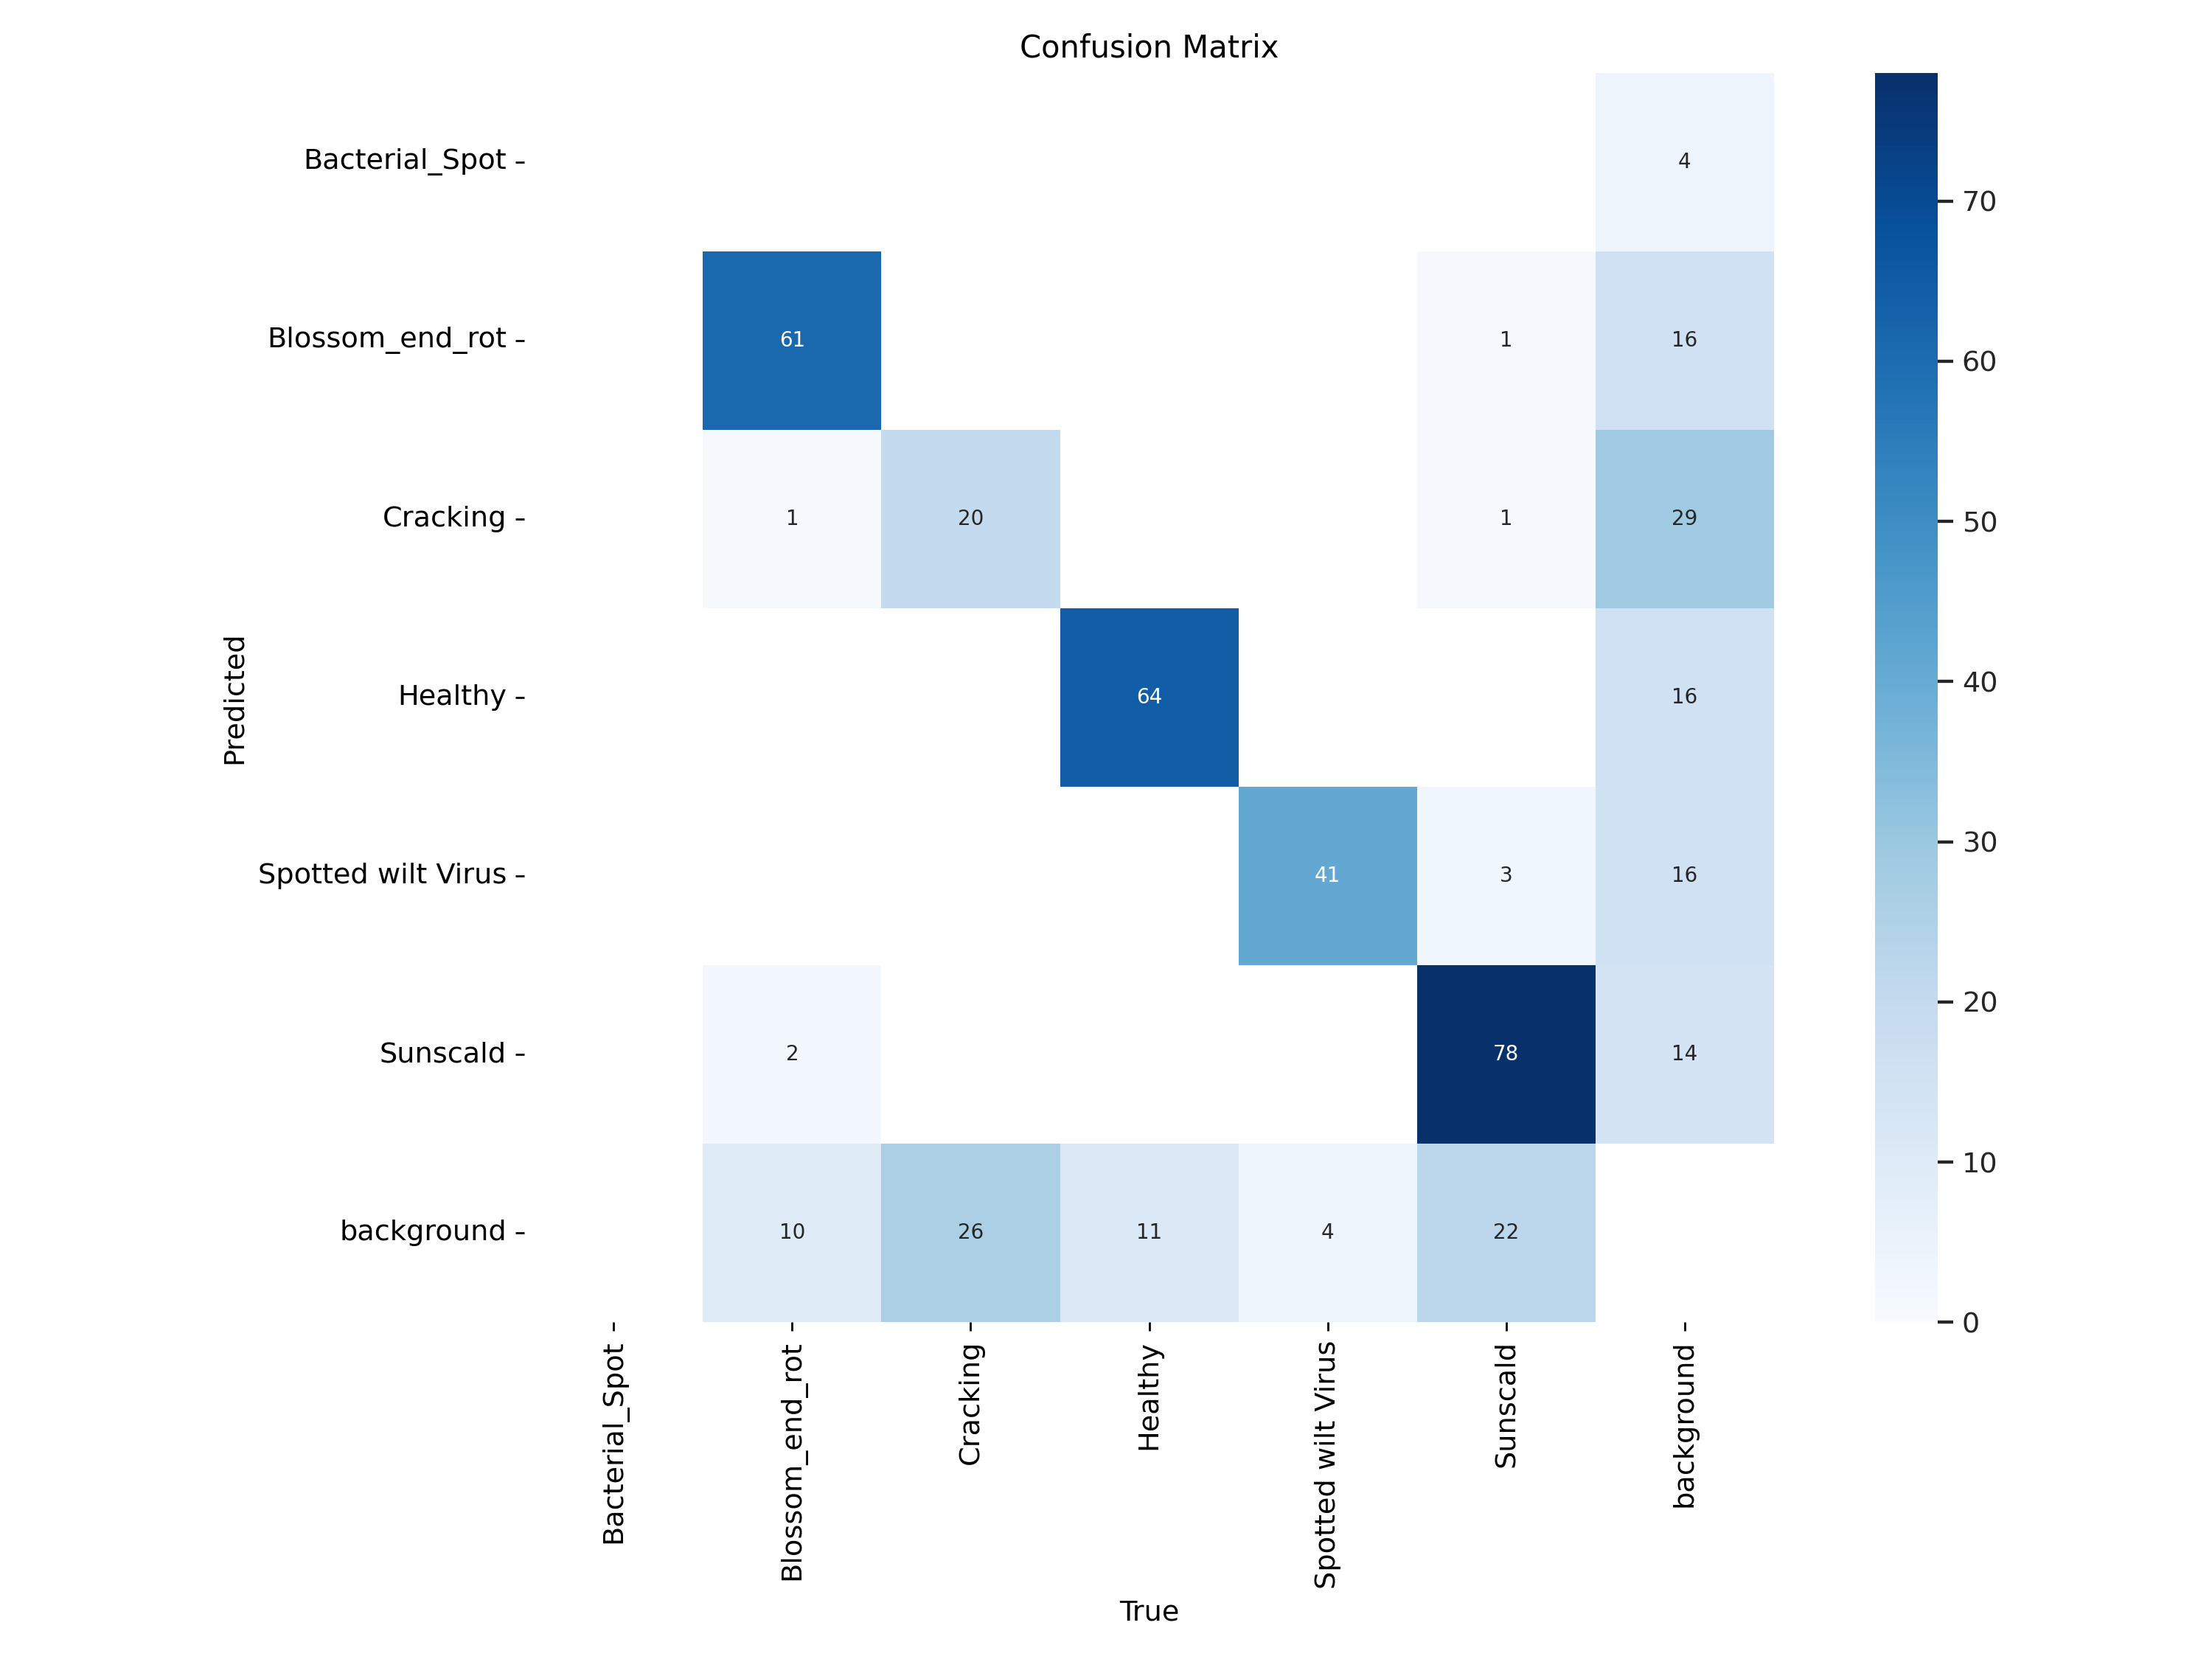

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

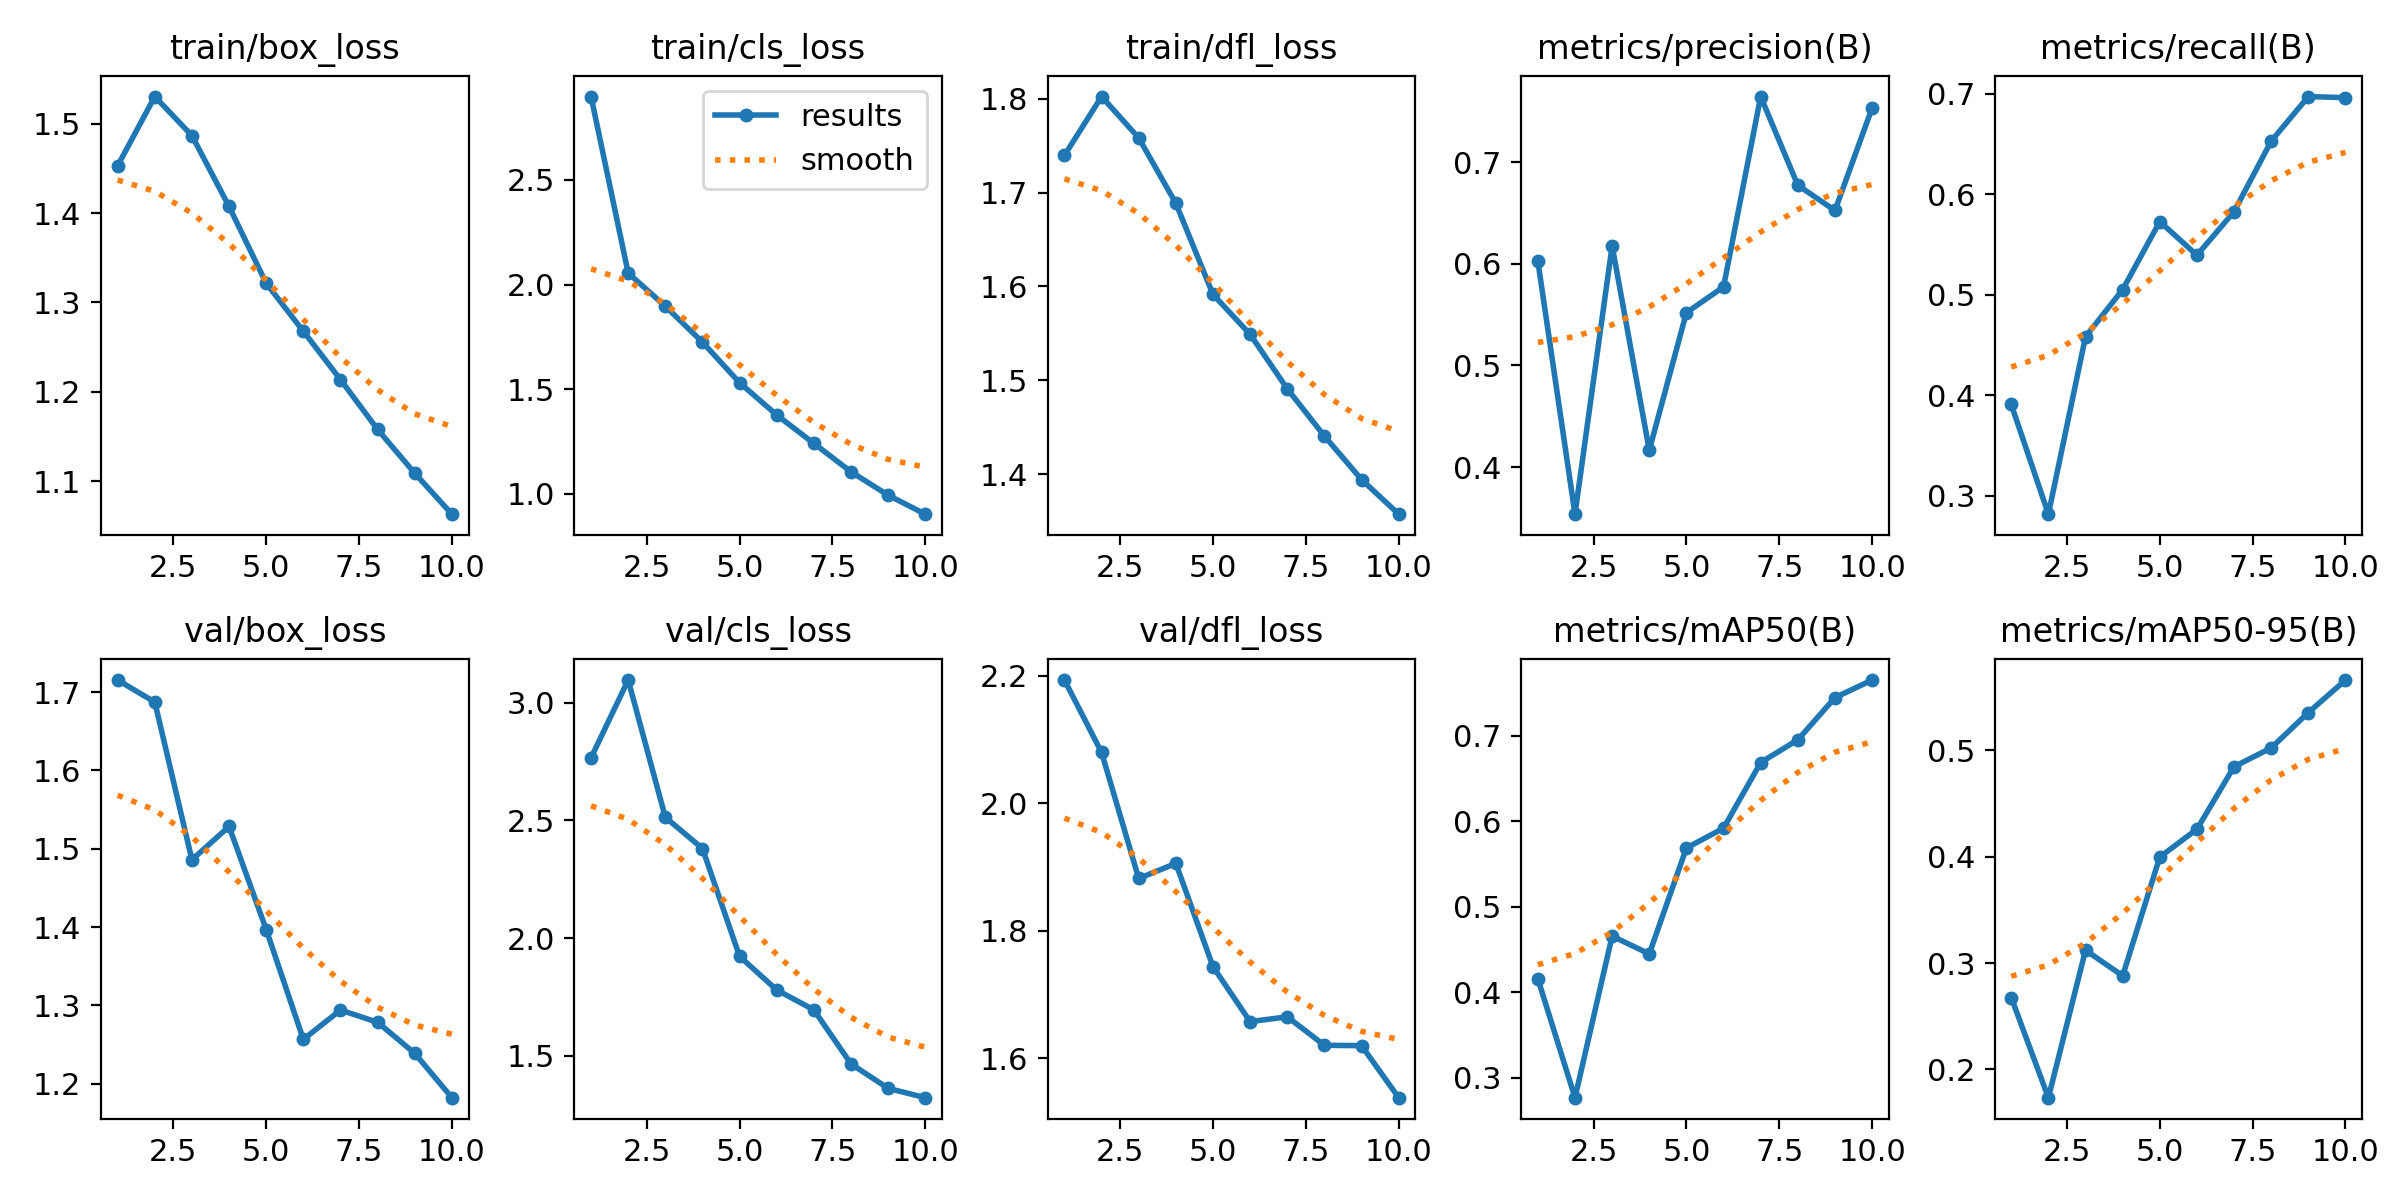

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

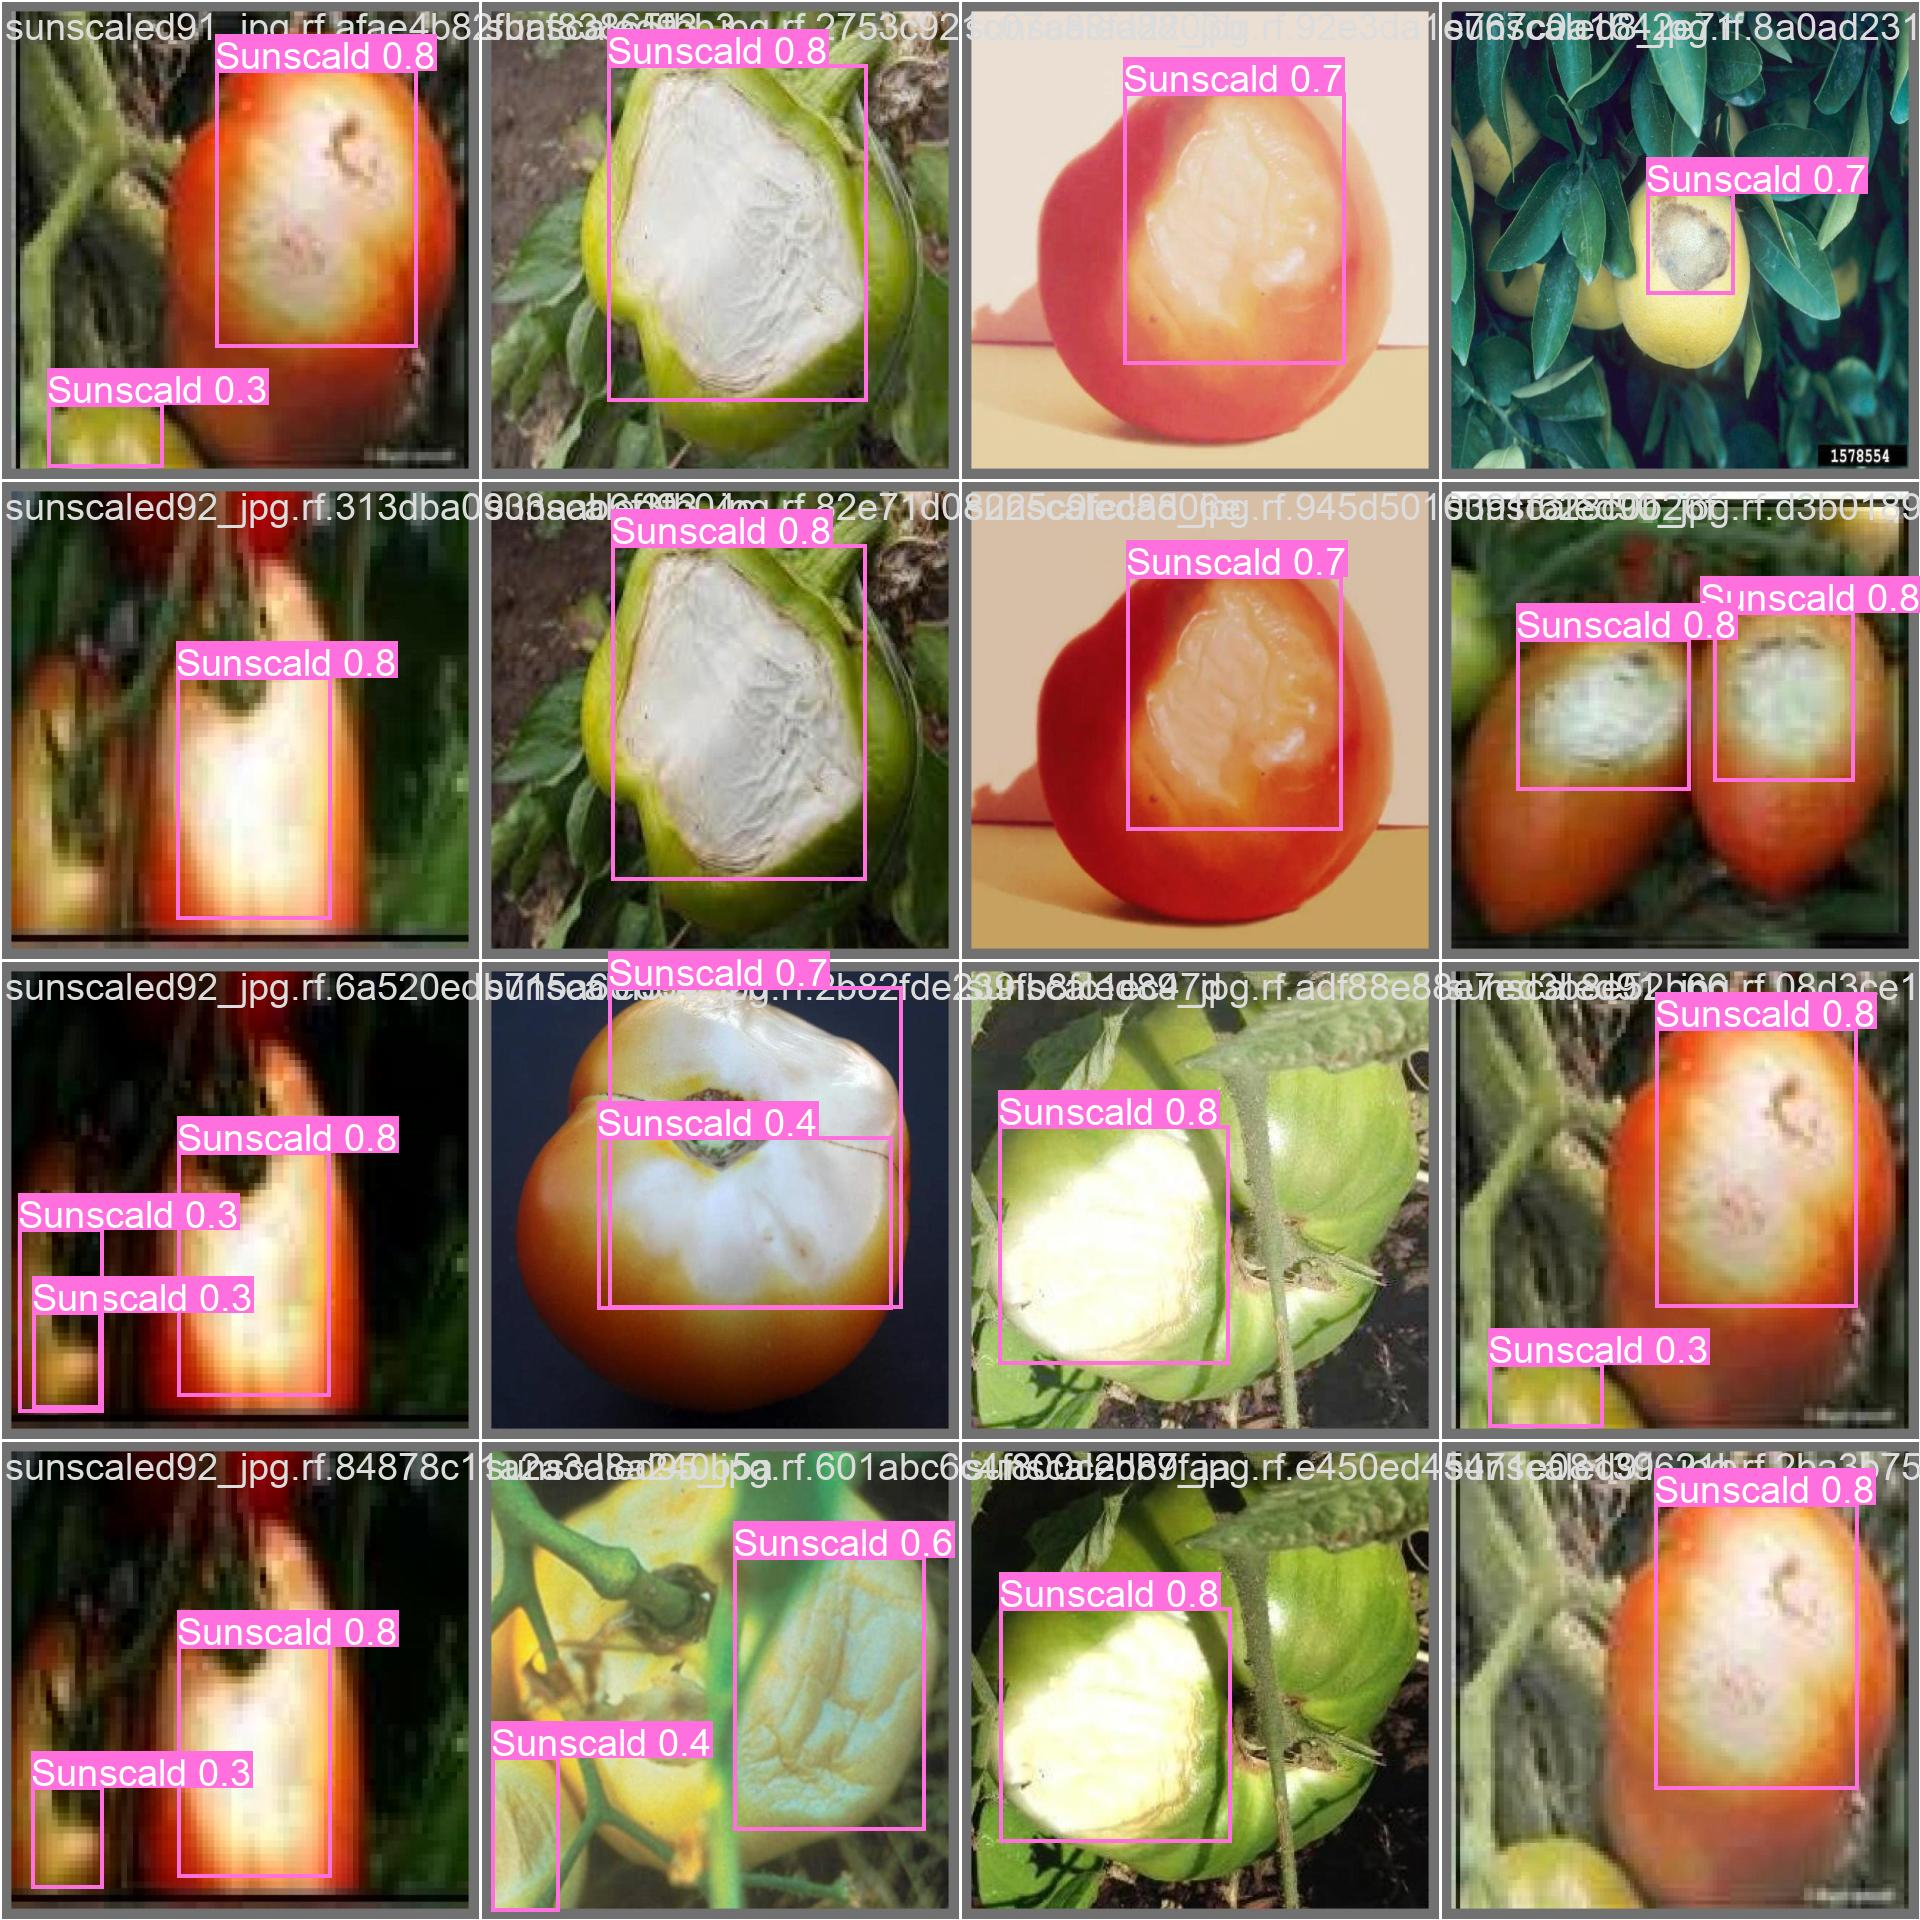

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Kamatis_Detection-5/valid/labels.cache... 327 images, 96 backgrounds, 0 corrupt: 100% 327/327 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 18, len(boxes) = 345. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [00:06<00:00,  3.50it/s]
                   all        327        345      0.753      0.696      0.765      0.566
       Blossom_end_rot         54         74      0.834      0.813       0.86      0.622
              Cracking         16         46      0.516      0.255      0.369      0.199
               Healthy     

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs

image 1/323 /content/datasets/Kamatis_Detection-5/test/images/1-6_thumb_png.rf.6b367b4cec046e232e965592192185e4.jpg: 640x640 1 Sunscald, 15.6ms
image 2/323 /content/datasets/Kamatis_Detection-5/test/images/6a00d8341c4fe353ef022ad364641d200c_jpg.rf.32c14d6cda4b228fe28a4c0f2375e96a.jpg: 640x640 (no detections), 15.6ms
image 3/323 /content/datasets/Kamatis_Detection-5/test/images/Healthy_tomato_train-101-_jpg.rf.4a9ea2b41a4dce4d40ad520a029b8f69.jpg: 640x640 1 Healthy, 15.5ms
image 4/323 /content/datasets/Kamatis_Detection-5/test/images/Healthy_tomato_train-123-_jpg.rf.81a352deddd30464d8cbebe791a6ea00.jpg: 640x640 1 Healthy, 15.6ms
image 5/323 /content/datasets/Kamatis_Detection-5/test/images/Healthy_tomato_train-124-_jpg.rf.6327e952b3726d5e2d5e8fefabb06b4e.jpg: 640x640 1 Healthy, 15.6ms
image 6/323 /content/datasets/Kamatis_

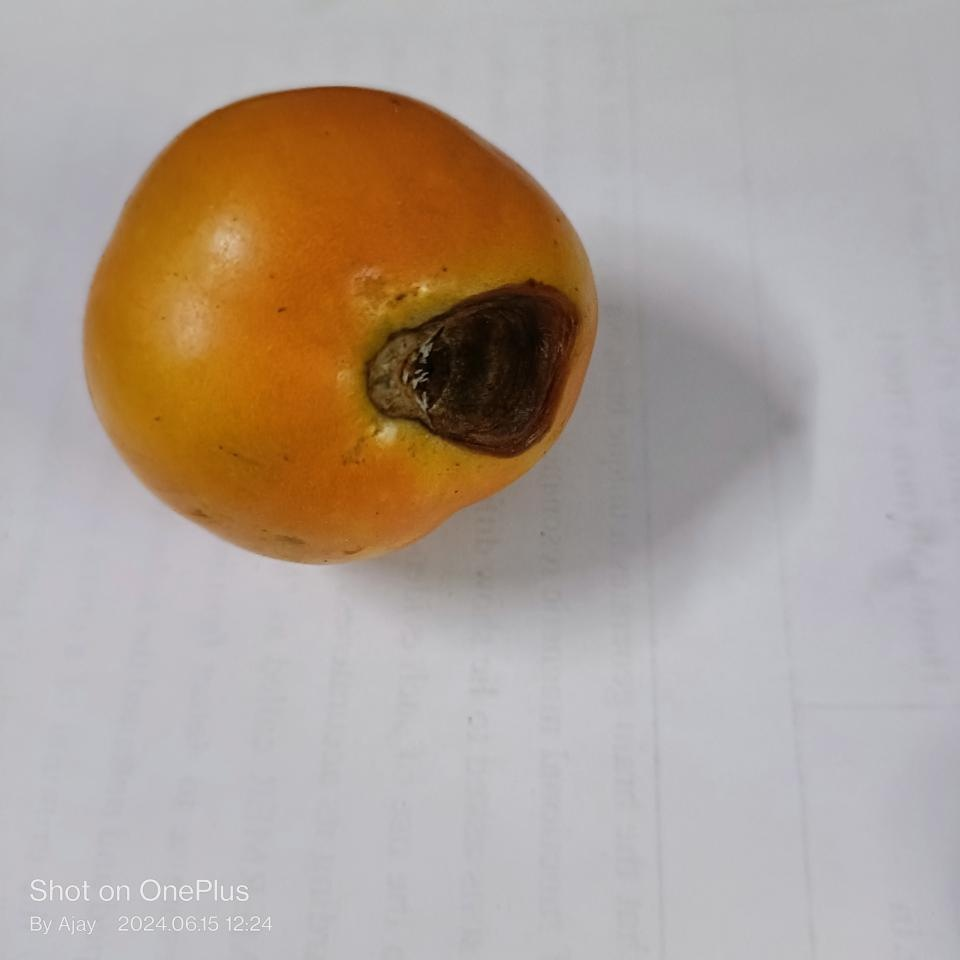

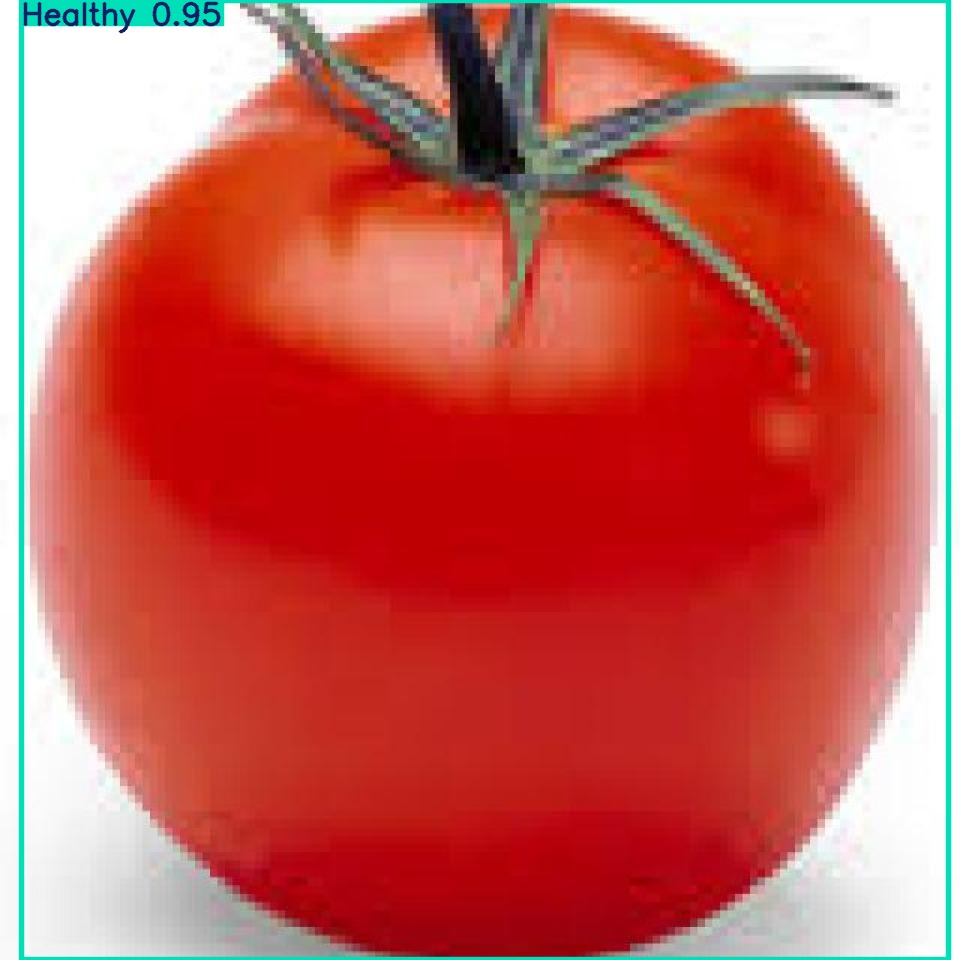

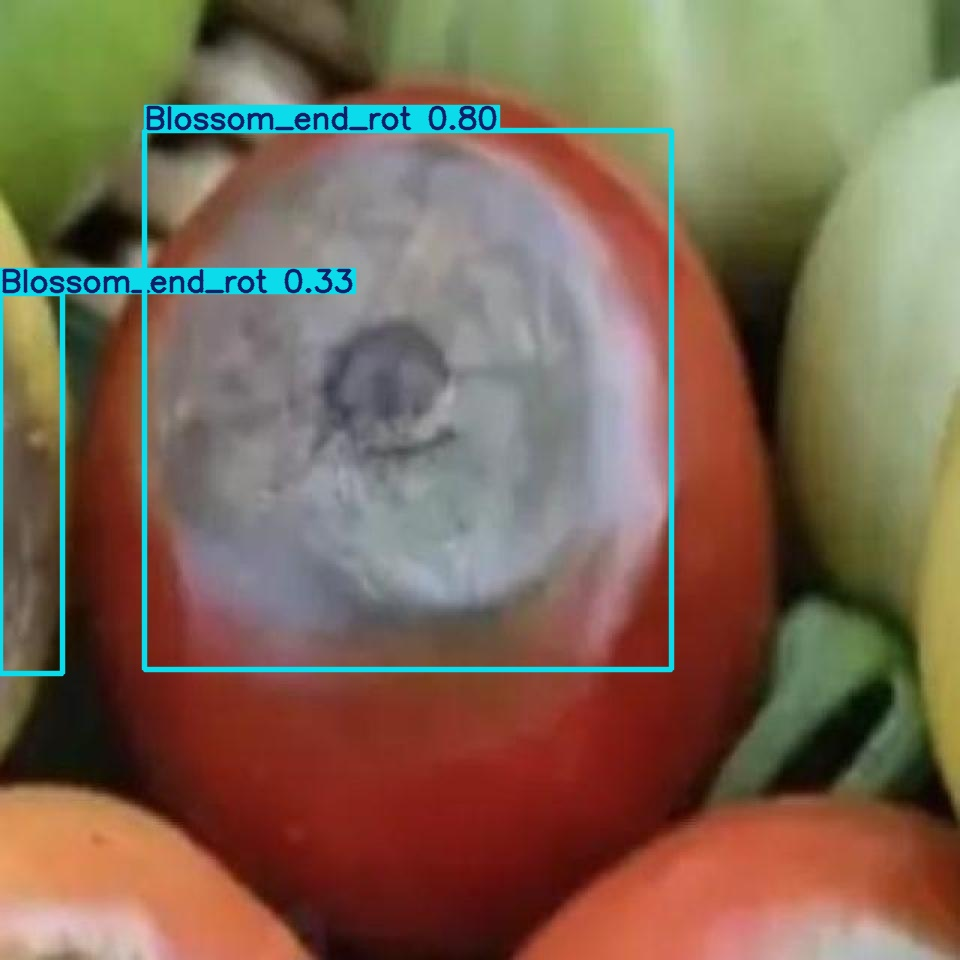

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

download the content


In [ ]:
%cd /content/

/content


In [ ]:
!zip -r datasets.zip datasets


Output streaming akan dipotong hingga 5000 baris terakhir.
  adding: datasets/Kamatis_Detection-5/train/labels/blossomendrot115_jpg.rf.3b2196a25c40deda6bf4a31b7c6552c2.txt (deflated 35%)
  adding: datasets/Kamatis_Detection-5/train/labels/spotted_wilt_virus_test-51-_jpg.rf.018e3bc5c7e159689b2b01da922a05b4.txt (deflated 39%)
  adding: datasets/Kamatis_Detection-5/train/labels/IMG20240615131642_jpg.rf.102effad48fe04eac27b64736b61142f.txt (deflated 61%)
  adding: datasets/Kamatis_Detection-5/train/labels/sunscaled201_jpg.rf.84c9b4f2ed1228f8cdc0ce8d3f4a7479.txt (deflated 50%)
  adding: datasets/Kamatis_Detection-5/train/labels/sunscaled78_jpg.rf.3103285284c7ee0039b6343dde48059a.txt (deflated 42%)
  adding: datasets/Kamatis_Detection-5/train/labels/IMG20240615122102_jpg.rf.a5bab4f0226bf703b9083fd6668ce170.txt (stored 0%)
  adding: datasets/Kamatis_Detection-5/train/labels/spotted_wilt_virus_train-36-_png.rf.bba59384c2028b3228c08b2212c6e9e9.txt (deflated 65%)
  adding: datasets/Kamatis_Detec

In [ ]:
!zip -r runs.zip runs


  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/predict/ (stored 0%)
  adding: runs/detect/predict/IMG20240615122400_jpg.rf.758b5f18ea85f0550348490cc0e3e6e1.jpg (deflated 11%)
  adding: runs/detect/predict/images-15-_jpg.rf.398aed967f86b47f689e4542d5b79b7b.jpg (deflated 11%)
  adding: runs/detect/predict/blossomendrot54_jpg.rf.b6a3e5ba1e740acc793251cace4245eb.jpg (deflated 7%)
  adding: runs/detect/predict/cracking222_jpg.rf.a2c410014430b898afd08e0d1ea84bd0.jpg (deflated 4%)
  adding: runs/detect/predict/helthy9_png.rf.6b9ad4f7e51ff8d01cf4f366aa24b1df.jpg (deflated 6%)
  adding: runs/detect/predict/spliting113_jpg.rf.802edda4dc3559fe57f100db3fc9d948.jpg (deflated 4%)
  adding: runs/detect/predict/IMG20240615122459_jpg.rf.22dafe313b309411106416cac1f8c9f9.jpg (deflated 11%)
  adding: runs/detect/predict/cracking180_jpg.rf.26904363490f062f42db1d7832c9305e.jpg (deflated 10%)
  adding: runs/detect/predict/IMG20240615121034_jpg.rf.e8a8414c3919031f37301de3